In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('seaborn-darkgrid')

In [2]:
# set figure size and figure format 

plt.rcParams['figure.figsize'] = [8, 6]
%config InlineBackend.figure_format = 'svg'

In [3]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines){
    return false;
}

<IPython.core.display.Javascript object>

In [4]:
df = pd.read_csv('data/prosperLoanData.csv')

### Distribution of  Borrower Rate

- The interest rate is the cost of borrowing the principal loan amount to the borrower. <br>
- The rate always expressed as a percentage. <br>
- Mean borrower interest rate in our data is 18.4%. 

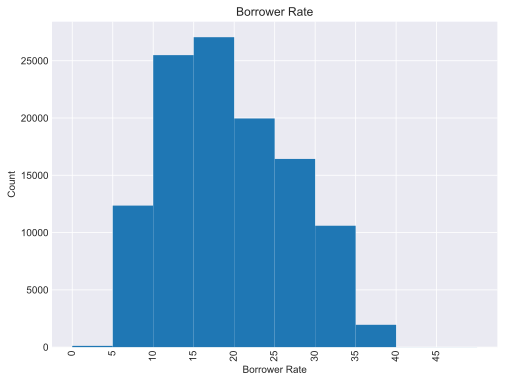

In [5]:
df['BorrowerRate'] =df['BorrowerRate'].apply(lambda x: x *100)
ticks =np.arange(0, 50 ,5)
labels = ['{}'.format(v) for v in ticks]
bins = np.arange(0, df['BorrowerRate'].max()+5, 5)
plt.hist(data = df, x = 'BorrowerRate', bins = bins);
plt.xticks(ticks, labels);
plt.xticks(rotation = 90);
plt.xlabel('Borrower Rate')
plt.ylabel('Count')
plt.title("Borrower Rate");

In [6]:
# since main one contain lots of variable , make new data frame from main one 
df_bi = df.loc[ :, ('LoanStatus',
                    'BorrowerAPR', 
                    'BorrowerRate',
                    'LenderYield',
                    'ProsperScore',
                    'BorrowerState',
                    'Occupation', 
                    'EmploymentStatus',
                    'IsBorrowerHomeowner',
                    'CreditScoreRangeLower',
                    'CreditScoreRangeUpper',
                    'RevolvingCreditBalance', 
                    'BankcardUtilization','DebtToIncomeRatio', 
                    'IncomeRange','LoanMonthsSinceOrigination',
                    'LoanOriginalAmount',
                    'LoanOriginationDate',
                    'MonthlyLoanPayment',
                    'LoanOriginationQuarter',
                    'Investors'
                   )]

In [7]:
df_bi['LoanOriginationYear'] = pd.to_datetime(df_bi['LoanOriginationDate']).dt.year

### Loan Origination Year vs Borrower Rate

- Average Borrower Rate increased from 2007 to 2011 in each year. 
- After that, rate is decreasing over the year.

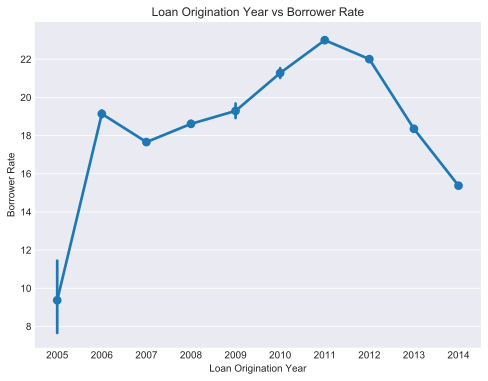

In [14]:
base_color = sns.color_palette()[0]
sns.pointplot(data = df_bi, x = 'LoanOriginationYear',
              y = 'BorrowerRate', color = base_color)
plt.xlabel('Loan Origination Year')
plt.ylabel('Borrower Rate')
plt.title('Loan Origination Year vs Borrower Rate');


In [9]:
df_bi['Status'] = np.where((df_bi['LoanStatus'] == 'Current') | 
                         (df_bi['LoanStatus'] == 'Completed')| 
                         (df_bi['LoanStatus'] == 'Cancelled'), 
                         'Completed', 'Defaulted')

### Borrower Rate vs Defaulted Status

- As borrower rate increase more people get defaulted.


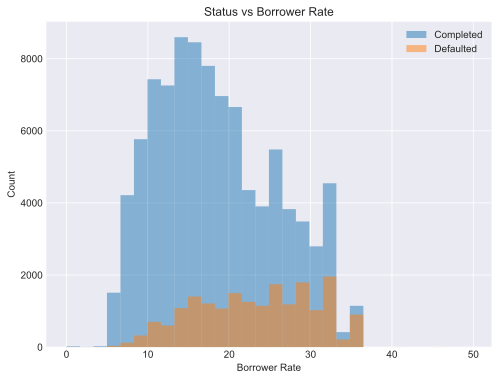

In [10]:
completed = df_bi['Status'] == 'Completed'
defaulted = df_bi['Status'] == 'Defaulted'

df['BorrowerRate'][completed].hist(label = 'Completed', alpha = 0.5, bins = 30)
df['BorrowerRate'][defaulted].hist(label = 'Defaulted', alpha = 0.5, bins = 30)

plt.xlabel('Borrower Rate')
plt.ylabel('Count')
plt.title('Status vs Borrower Rate');
plt.legend();

### Loan Origination Year and Borrower Rate vs Status

- Borrower rate is higher for defaulter in each Year than who completed the loan.

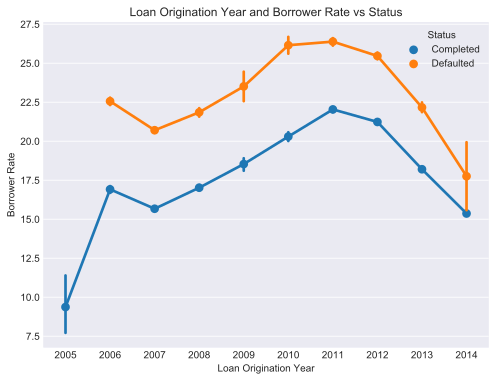

In [11]:
sns.pointplot(data = df_bi, x = 'LoanOriginationYear', 
            y = 'BorrowerRate', hue = "Status");

plt.xlabel('Loan Origination Year')
plt.ylabel('Borrower Rate')
plt.title('Loan Origination Year and Borrower Rate vs Status');

In [12]:
np.random.seed(2018)
sample = np.random.choice(df_bi.shape[0], 10000, replace= False)
df_subset = df_bi.loc[sample]

### Credit Score Range Upper and Borrower Rate vs Status

- Low credit score causes higher borrower rate and with higher borrower rate ended up with defaulted.

In [13]:
sns.scatterplot(data = df_subset, x = 'CreditScoreRangeUpper', y = 'BorrowerRate', 
                hue = "Status",alpha = 0.3);

plt.xlabel('Credit Score Range Upper')
plt.ylabel('Borrower Rate')
plt.title('Credit Score Range Upper and Borrower Rate vs Status');
plt.xlim((400, 900));